# Burglary is more common in Seattle

The criminal incident data of Seattle, Washington and San Francisco, California covering the summer 2014 period was analyzed. The analysis analysis crime trends in the different states 

## Seattle

The data set contained crime reports over the summer 2014 period. This data was loaded and analyzed using the python code below. 

In [1]:
%matplotlib inline

This forces all the graphs to be inline

In [2]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
from random import shuffle
from csv import reader
from math import ceil

Importing the required python packages.

In [3]:
class Report:
    def __init__(self, offense, reportdate, district, zone):
        self.offense = offense
        self.reportdate = reportdate
        self.district = district
        self.zone = zone
    def __str__(self):
        return "Offense:" + self.offense + " ReportDate: " + str(self.reportdate) + " District: " + self.district + " Zone: " + self.zone

Definition of private class used to store data. This class is used to abstract the schema differences between the two states. After loading the dataset graphs can be plotted without tweaking the code.

In [4]:
def loadcsv(datafile, crimeidx, districtidx, datetimeformat=None, zoneidx=None,reportdatetimeidx= None, alternatereportdatetimeidx=None, reportdateidx=None, reporttimeidx=None, reportdateformat=None, reporttimeformat=None,):
    reportlist = []
    with open(datafile, 'r') as csvfile:
        next(csvfile) # has header
        offenselist = reader(csvfile, delimiter=',', quotechar='|')
        for row in offenselist:
            crime = row[crimeidx]
            if reportdatetimeidx is not None:
                if row[reportdatetimeidx] == "":
                    rd = row[alternatereportdatetimeidx]
                else:
                    rd = row[reportdatetimeidx]
            if reportdateidx is not None and reporttimeidx is not None:
                rd = row[reportdateidx] + " " + row[reporttimeidx]
            reportdate = datetime.datetime.strptime(rd, datetimeformat)
            district = row[districtidx]
            if zoneidx is not None:
                zone = row[zoneidx]
            else:
                zone = district
            reportlist.append(Report(crime,reportdate, district, zone))
    return reportlist


This method is used to load the data from the CSV file. The code is parameterized to handle the different schema of Seattle and San Francisco. In both cases the CSV is read and a list of Reports is returned.

Some of the entries in the Seattle dataset had missing data, for example, the occured date of the crime was missing, in that case the crime date is assumed to be the report date. This assumption is important, however in this case it will not influence any findings or conclusions.

In [5]:
    # 6 Summary Offense Code
    # 8 Date Reported
    # 9 Actual Date (sometimes None)
    # 11 District/Sector
    # 12 Zone/Beat
    reportlist_seattle = loadcsv(datafile='assignment6/seattle_incidents_summer_2014.csv', crimeidx=6, reportdatetimeidx=9, alternatereportdatetimeidx=8, districtidx=11, zoneidx=12, datetimeformat="%m/%d/%Y %H:%M:%S %p")
    

The  lists containing the reports of Seattle data set is built. Some parameters in the `loadcsv` are optional, though the parameters given the data is loaded and takes the nescessary action to make up for missing data.

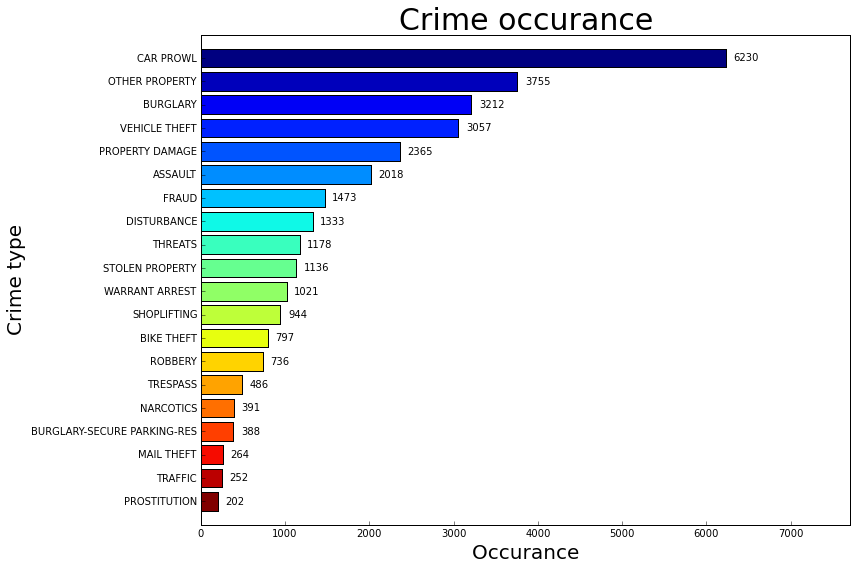

In [6]:
def getoffensecount(reportlist, sortresult = True):
    crimedict = {}
    for row in reportlist:
        crime = row.offense
        if crime in crimedict:
            crimedict[crime] += 1
        else:
            crimedict[crime] = 1
    if (sortresult == True):
        sorteddict = sorted(crimedict.items(), key=itemgetter(1),  reverse=True)
    return sorteddict

def gettopitems(dictionary, noofitems, sorted = True):
    list1, list2 = [], []
    if sorted == True:
        sorteddict = dictionary
    else:
        sorteddict = sorted(dictionary.items(), key=itemgetter(1),  reverse=True)
    for x in range(0, noofitems):
        list1.append(sorteddict[x][0])
        list2.append(sorteddict[x][1])
    return list1,list2

def showtop(dictionary, noofitems, sorted = True):
    if sorted == True:
        sorteddict = dictionary
    else:
        sorteddict = sorted(dictionary.items(), key=itemgetter(1),  reverse=True)
    for x in range(0, noofitems):
        print (sorteddict[x][0] + " " + str(sorteddict[x][1]))

def plotcrimeoccurance(crimedesc, crimeoccur):
     listlen = len(crimedesc)
     N = range(listlen)
     jet = plt.get_cmap('jet')
     fig = plt.figure(figsize=(12,8))
     ax = fig.add_subplot(111)

     p1 = plt.barh(N, crimeoccur, align='center', color=jet(np.linspace(0, 1.0, listlen)))
     plt.yticks(N, crimedesc)
     plt.ylabel('Crime type', fontsize = 20 )
     plt.xlabel('Occurance ', fontsize = 20 )
     plt.title('Crime occurance', fontsize = 30 )
     autolabelh(p1, ax, xoffset=100)
     ax.xaxis.set_ticks_position('bottom')
     ax.yaxis.set_ticks_position('left')
     maxx_1 = max(crimeoccur)
     maxx = ceil((maxx_1/1540))*1540
     plt.axis([0, maxx, listlen , -1])
     plt.tight_layout()
        
def autolabelh(rects, ax, xoffset = 45):
    for rect in rects:
        width = rect.get_width()
        height = rect.get_height()
        ax.text(xoffset +rect.get_x() +  width  , rect.get_y() + (height/2) *.98 , '%d' % int(width), fontsize=10, ha='left', va='center')
        
def chartcrimeoccurance(reportlist):
    crimedict = getoffensecount(reportlist)
    crimedesc, crimeoccur = gettopitems(crimedict, 20)
    plotcrimeoccurance(crimedesc, crimeoccur)

chartcrimeoccurance(reportlist_seattle)


The figure above shows the occurance of the crime and the major category of the crime. The "OTHER PROPERTY" category is a general category for other types of theft, such as building theft. Car prowl is the most common crime and it amounts to 19% of the total number of report. From this chart, it emerges that the top three occurring crimes are theft related and they amount to 33.6% of the total number of reports.

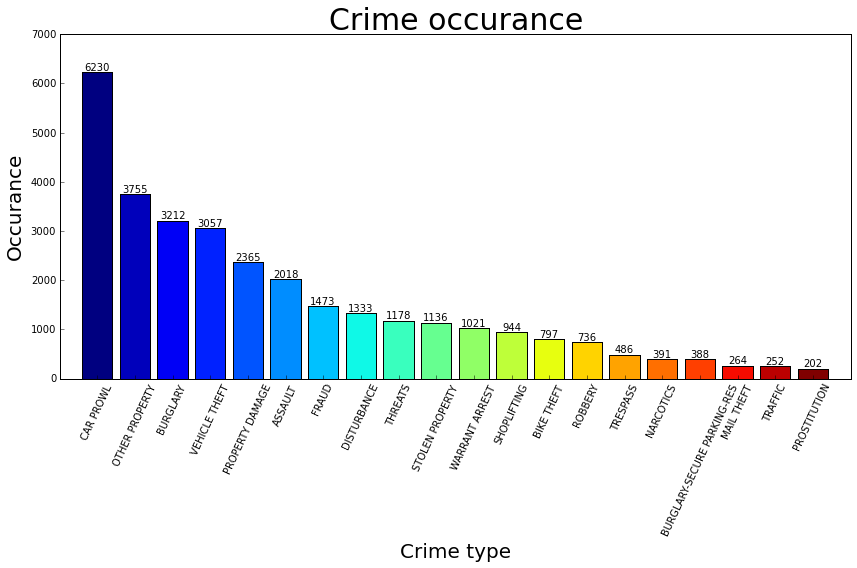

In [7]:
def autolabel(rects, ax):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height + 4, '%d' % int(height), fontsize=10, ha='center', va='bottom')

def plotcrimeoccurancev(crimedesc, crimeoccur):
     l = len(crimedesc)
     N = range(l)
     jet = plt.get_cmap('jet')
#     plt.bar(range(N), crimeoccur, align='center', color=jet(np.linspace(0, 1.0, N)))

#     plt.rcParams.update({'font.size': 14})
     fig = plt.figure(figsize=(12,8))
     ax = fig.add_subplot(111)
     p1 = plt.bar(N, crimeoccur, align='center', color=jet(np.linspace(0, 1.0, l)))
     plt.xticks(N, crimedesc, rotation=65)
     plt.xlabel('Crime type', fontsize = 20 )
     plt.ylabel('Occurance', fontsize = 20 )
     plt.title('Crime occurance', fontsize = 30)
     autolabel(p1, ax)
     ax.xaxis.set_ticks_position('bottom')
     ax.yaxis.set_ticks_position('left')
    # plt.axis([min(x_arr), max(x_arr), max(y_arr), 0])
     maxy = ceil((max(crimeoccur)/1000))*1000
     plt.axis([-1, l , 0, maxy])
     plt.tight_layout()     

def chartcrimeoccurancev(reportlist):
    crimedict = getoffensecount(reportlist)
    #showtop(crimedict, 20)
    crimedesc, crimeoccur = gettopitems(crimedict, 20)
    plotcrimeoccurancev(crimedesc, crimeoccur)
    #print (crimedesc)
    #print (crimeoccur)

chartcrimeoccurancev(reportlist_seattle)

Figure 1 shows the occurance of the crime and the major cateogry of the crime. The "OTHER PROPERTY" category is a general category for other types of theft, such as building theft. Car prowl is the most common crime and it amounts to 19% of the total number of report. From this chart, it emerges that the top three occurring crimes are theft related and they amount to 33.6% of the total number of reports.

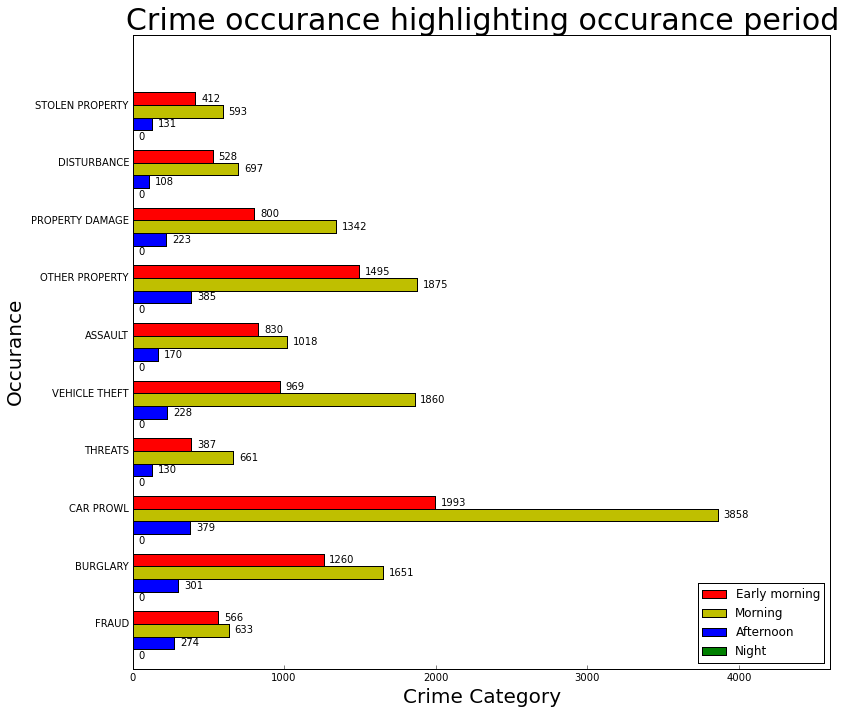

In [8]:
EARLY_MORNING="Early morning"
MORNING="Morning"
AFTERNOON="Afternoon"
NIGHT="Night"

timeconvert =  {
                0 : EARLY_MORNING,
                1 : EARLY_MORNING,
                2 : EARLY_MORNING,
                3 : EARLY_MORNING,
                4 : EARLY_MORNING,
                5 : EARLY_MORNING,
                6 : MORNING,
                7 : MORNING,
                8 : MORNING,
                9 : MORNING,
               10 : MORNING,
               11 : MORNING,
               12 : AFTERNOON,
               13 : AFTERNOON,
               14 : AFTERNOON,
               15 : AFTERNOON,
               16 : AFTERNOON,
               17 : AFTERNOON,
               18 : NIGHT,
               19 : NIGHT,
               20 : NIGHT,
               21 : NIGHT,
               22 : NIGHT,
               23 : NIGHT,
               24 : NIGHT,
}

def offensetime(reportlist, crim):
    dict = {}
    for row in reportlist:
        if row.offense == crim:
            key = timeconvert[row.reportdate.time().hour]
            if key in dict:
                dict[key] += 1
            else:
                dict[key] = 1
    return dict

def prepdataplotcrimeocurrancetiming(dict):
    earlymorning, morning, afternoon, night, title = [], [], [], [], []
    for entry in dict:
        key = entry
        title.append(key) # append heading
        lists = dict[entry]
        if EARLY_MORNING in lists:
            earlymorning.append(lists[EARLY_MORNING])
        else:
            earlymorning.append(0)
        if MORNING in lists:
            morning.append(lists[MORNING])
        else:
            morning.append(0)
        if AFTERNOON in lists:
            afternoon.append(lists[AFTERNOON])
        else:
            afternoon.append(0)
        if NIGHT in lists:
            night.append(lists[NIGHT])
        else:
            night.append(0)
    return title, earlymorning, morning, afternoon, night

def plotcrimeocurrancetiming(title, earlymorning, morning, afternoon, night):
    N = len(title)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.22     # the width of the bars: can also be len(x) sequence

    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    p1 = ax.barh(ind, earlymorning, width,   color='r')
    p2 = ax.barh(ind + width, morning, width, color='y')
    p3 = ax.barh(ind + (width * 2), afternoon, width,  color='b')
    p4 = ax.barh(ind + (width * 3), night, width, color='g')

    ax.set_title('Crime occurance highlighting occurance period' , fontsize = 30)
    plt.ylabel('Occurance', fontsize = 20 )
    plt.xlabel('Crime Category', fontsize = 20 )  
    ax.set_yticks(ind + (width * 1))
    ax.set_yticklabels(title)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.legend((p1[0], p2[0], p3[0], p4[0]), (EARLY_MORNING, MORNING, AFTERNOON,NIGHT),  loc='lower right')
    autolabelh(p1, ax)
    autolabelh(p2, ax)
    autolabelh(p3, ax)
    autolabelh(p4, ax)
    maxx_1 = max(earlymorning + morning + afternoon + night)
    maxx = ceil((maxx_1/1150))*1150
    plt.axis([0, maxx, N   , -1])    
    plt.tight_layout()

def chartcrimeocurrancetiming(reportlist):
    dict = {}
    crimedict = getoffensecount(reportlist)
    #showtop(crimedict, 20)
    crimedesc, crimeoccur = gettopitems(crimedict, 10)
    for crim in crimedesc:
        offensetiming = offensetime(reportlist, crim)
        dict[crim] = offensetiming
    title, earlymorning, morning, afternoon, night = prepdataplotcrimeocurrancetiming(dict)
    plotcrimeocurrancetiming(title, earlymorning, morning, afternoon, night)

chartcrimeocurrancetiming(reportlist_seattle)


The above chart, sub divides the ten top most occurring crimes with the time of occurance. In order to group the data, the day is divided in four time bands, as illustrated below:

* from  midnight  to six labelled as early morning
* from six to noon labelled as morning
* from noon to six labelled as afternoon
* from six to midnight labelled as night

From the above bar chart, a trend that morning time band is more common for the top ten crimes, followed by early morning. In the sample data provided for this assignment no crimes occurred during the night.

Car prowl is the very common in the morning hours.



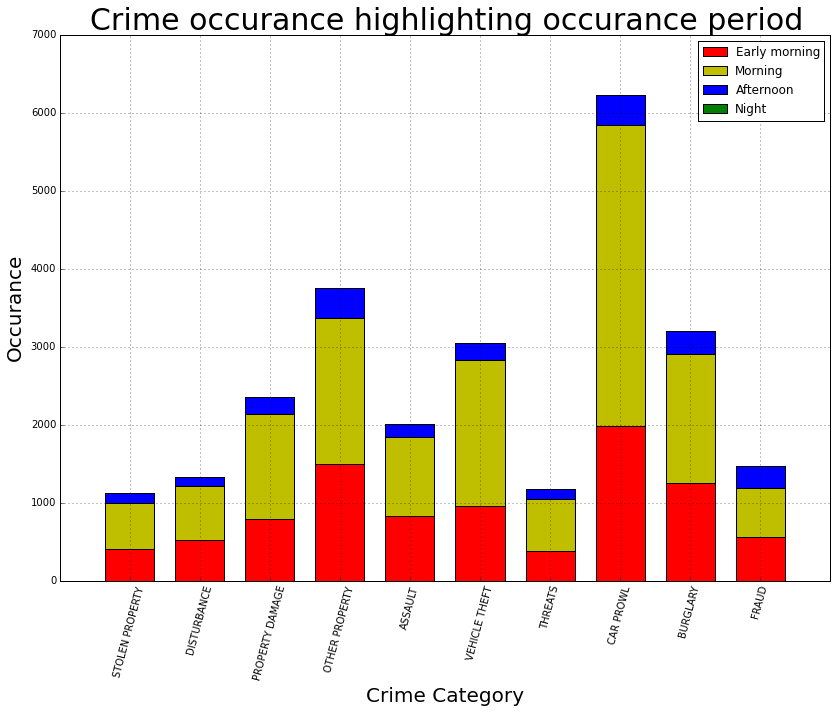

In [9]:
def plotgraphchart2b(title, earlymorning, morning, afternoon, night):
    # Final hbar !!
    N = len(title)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.7     # the width of the bars: can also be len(x) sequence

    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    # calc references
    morning_ref = earlymorning
    afternoon_ref = list(map(lambda x, y: x + y, morning_ref, morning))
    aftenight_ref = list(map(lambda x, y: x + y, afternoon_ref, afternoon))
    
    p1 = ax.bar(ind, earlymorning, width, align='center', color='r')
    p2 = ax.bar(ind , morning, width, bottom=morning_ref,  align='center', color='y')
    p3 = ax.bar(ind , afternoon,  width, bottom=afternoon_ref , align='center', color='b')
    p4 = ax.bar(ind , night,  width, bottom=aftenight_ref, align='center', color='g')
    
    ax.set_title('Crime occurance highlighting occurance period' , fontsize = 30)
    plt.ylabel('Occurance', fontsize = 20 )
    plt.xlabel('Crime Category', fontsize = 20 )    
    ax.set_xticks(ind)
    ax.set_xticklabels(title, rotation=75)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.legend((p1[0], p2[0], p3[0], p4[0]), (EARLY_MORNING, MORNING, AFTERNOON,NIGHT))
    ax.grid(True)

    maxy_1 = max(map(lambda w,x,y,z: w + x + y +z, earlymorning, morning, afternoon, night ))
    maxy = ceil((maxy_1/1000))*1000
    plt.axis([ -1, N ,0, maxy])
    plt.tight_layout()
    
def chart2b(reportlist):
    dict = {}
    crimedict = getoffensecount(reportlist)
    #showtop(crimedict, 20)
    crimedesc, crimeoccur = gettopitems(crimedict, 10)
    for crim in crimedesc:
        offensetiming = offensetime(reportlist, crim)
        dict[crim] = offensetiming
    title, earlymorning, morning, afternoon, night =  prepdataplotcrimeocurrancetiming(dict)
    plotgraphchart2b(title, earlymorning, morning, afternoon, night)    
    
chart2b(reportlist_seattle)

The above chart, sub divides the ten top most occurring crimes with the time of occurance. In order to group the data, the day is divided in four time bands, as illustrated below:

* from  midnight  to six labelled as early morning
* from six to noon labelled as morning
* from noon to six labelled as afternoon
* from six to midnight labelled as night

From the above bar chart, a trend that morning time band is more common for the top ten crimes, followed by early morning. In the sample data provided for this assignment no crimes occurred during the night.

Car prowl is the very common in the morning hours.

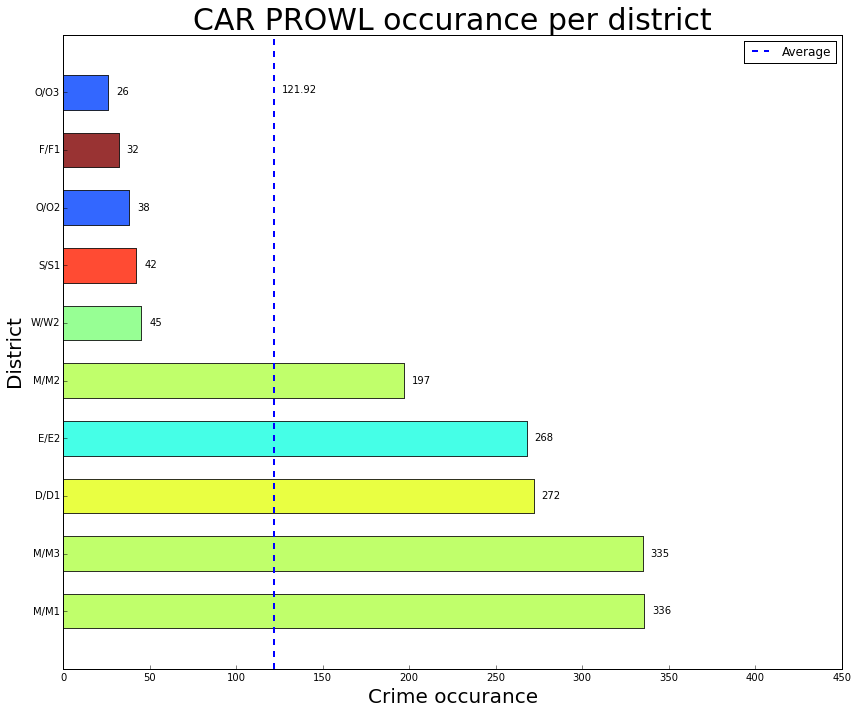

In [10]:
def preparetopcrime(dict, offense):
    districtlist = []
    zonelist = []
    occurancelist = []
    for entry in dict:
        if entry.district == "" or entry.district == "99":
              continue
#          print entry.district + " " + entry.zone
        key = entry.offense
        if key == offense:
            district = entry.district
            if district == entry.zone:
                zone = entry.zone
            else:
                zone = district + "/" + entry.zone
            if zone in zonelist:
                idx = zonelist.index(zone)
                occurancelist[idx] = occurancelist[idx] + 1
            else:
                districtlist.append(district)
                zonelist.append(zone)
                occurancelist.append(1)
    # sort
    occurancelist_s, zonelist_s, districtlist_s = zip(*sorted(zip(occurancelist,zonelist,districtlist)))

    uniquedistricts = list(set(districtlist_s))
    uniquedistrictslen = len(uniquedistricts)

    # colorise districts with the same color
    jet = plt.get_cmap('jet')
    colors = jet(np.linspace(0, 1.0, uniquedistrictslen))
    colorlist = []
    for k in range(0, len(districtlist_s)):
        d = districtlist_s[k]
        idx = uniquedistricts.index(d)
        colorlist.append(colors[idx])
        
    # calculate mean
    y_mean =np.mean( occurancelist_s)

    districtlist_s = prunelist(districtlist_s,5,5)
    zonelist_s = prunelist(zonelist_s,5,5)
    occurancelist_s = prunelist(occurancelist_s, 5,5)
    colorlist =  prunelist(colorlist,5,5)
    
    return districtlist_s, zonelist_s, occurancelist_s,colorlist,y_mean

def prunelist(alist,headkeep , tailkeep):
    l = len(alist)
    return (alist[0:headkeep] + alist[l-tailkeep:l])
    
def plotpreparetopcrime(crim, districtlist, zonelist, occurancelist, colorlist,y_mean):
    l = len(zonelist)
    N = range(l)
    jet = plt.get_cmap('jet')
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)

    p1 = plt.barh(N, occurancelist, align='center', color=colorlist, height=0.6, alpha=.8)
    avgline = plt.axvline(y_mean, color='b', linestyle='dashed', linewidth=2)
    plt.text(y_mean + 5 ,0,'{0:.2f}'.format(y_mean),rotation=0)

    plt.yticks(N, zonelist)
    plt.xlabel('Crime occurance', fontsize = 20 )
    plt.ylabel('District', fontsize = 20 )
    plt.title(crim + ' occurance per district', fontsize = 30 )
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    maxx_1 = max(occurancelist)
    maxx = ceil((maxx_1/150))*150
    plt.axis([0, maxx ,l, -1])
    ax.legend([avgline], ["Average"])

    autolabelh(p1, ax, xoffset=5)
    
    plt.tight_layout()

def charttopcrime(reportlist):
    dict = {}
    crimedict = getoffensecount(reportlist)
    crimedesc, crimeoccur = gettopitems(crimedict, 1)
    for crim in crimedesc:
        districtlist, zonelist, occurancelist, colorlist, meancrimes = preparetopcrime(reportlist, crim)
        plotpreparetopcrime(crim, districtlist, zonelist, occurancelist, colorlist,meancrimes)

charttopcrime(reportlist_seattle)

The most occuring crime is further analysed, taking into perspective the district. In case of seattle the districts are sub divided in zones. For clarity the above figure shows only the zones with the most and least occuring car prowing. Car prowling occurs most frequently in district M zones M1 and M3. Whilst the least number of car prowling was registered in distict O zone O3. Reports in zones M2 and M3 are almost three times higher than the average in the state across all districts/zone. The dashed line represents the state average for better comparision with the state average. For example district F, zone F1 has half the average car prowling rate of the state, whilst district M zone M3 has one and half times the average rate.

## San Francisco

In this section, analysis of the San Francisco dataset will be performed. The code was written to handle the different dataset without any changes. Only the loading phase is different due to the different schema of the data file.

In [11]:
# 2 Category
# 4 Date
# 5 Time
# 8 District
reportlist_sanfrancisco = loadcsv(datafile='assignment6/sanfrancisco_incidents_summer_2014.csv', crimeidx=1,reportdateidx=4, reporttimeidx=5, districtidx=6, datetimeformat = "%m/%d/%Y %H:%M")


The  lists containing the reports of San Francisco data set is loaded. The same method `loadcsv` was used. The parameteres are different from the Seattle invokation due to the different schema.


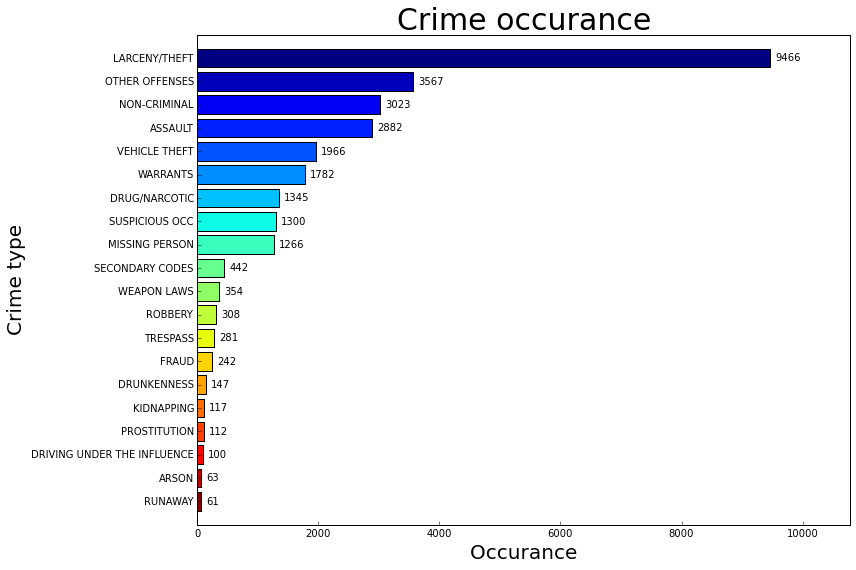

In [12]:
chartcrimeoccurance(reportlist_sanfrancisco)

The figure above shows the occurance of the crime and the major category of the crime in the city of San Francisco. The most occurring crime is theft/larceny, followed by assult.  The crimes in the other category is low, this shows that the most predominate crime in San Francisco is theft.

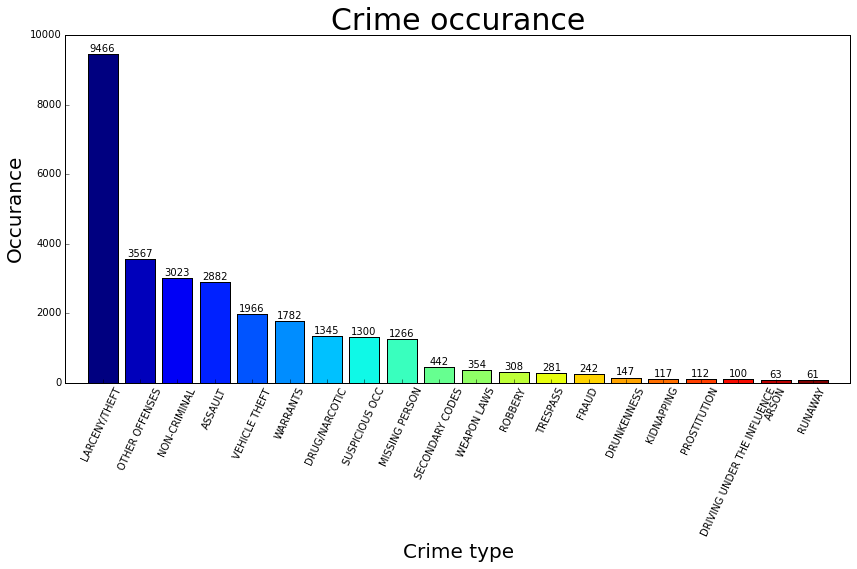

In [13]:
chartcrimeoccurancev(reportlist_sanfrancisco)

The figure above shows the occurance of the crime and the major category of the crime in the city of San Francisco. The most occurring crime is theft/larceny, followed by assult.  The crimes in the other category is low, this shows that the most predominate crime in San Francisco is theft.

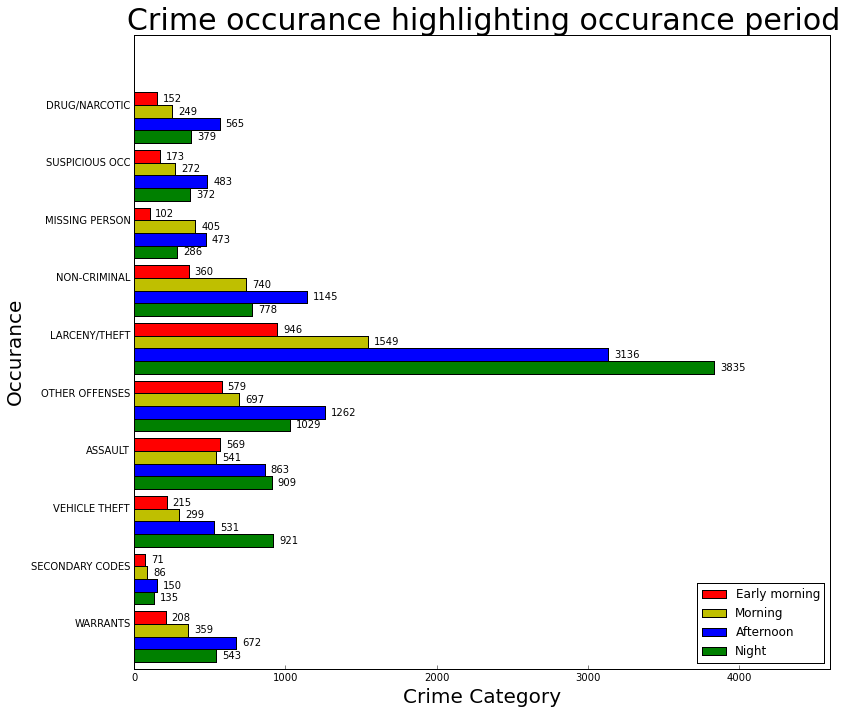

In [14]:
chartcrimeocurrancetiming(reportlist_sanfrancisco)

The above chart shows the top ten common crimes subdivided according to the time band in which the crime occurred. The same scheme as for the Seattle data set is used, i.e.:

* from  midnight  to six labelled as early morning
* from six to noon labelled as morning
* from noon to six labelled as afternoon
* from six to midnight labelled as night

From the chart above, the general trend is during the night time band there is a higher incidences of crimes, on the other hand the early morning registers lowest incidence for most crimes. Larceny is very common during 18:00 to midnight.

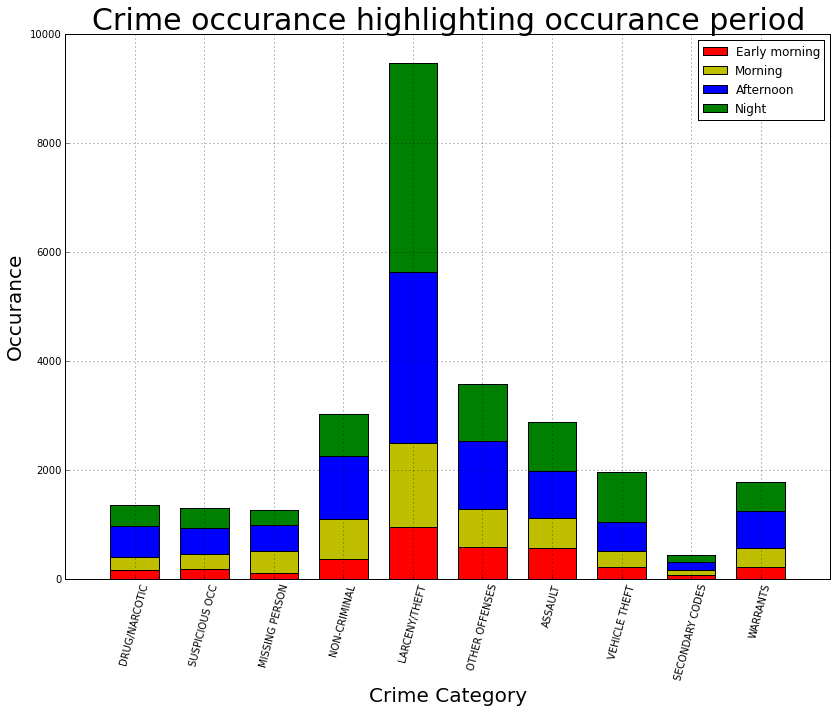

In [15]:
chart2b(reportlist_sanfrancisco)

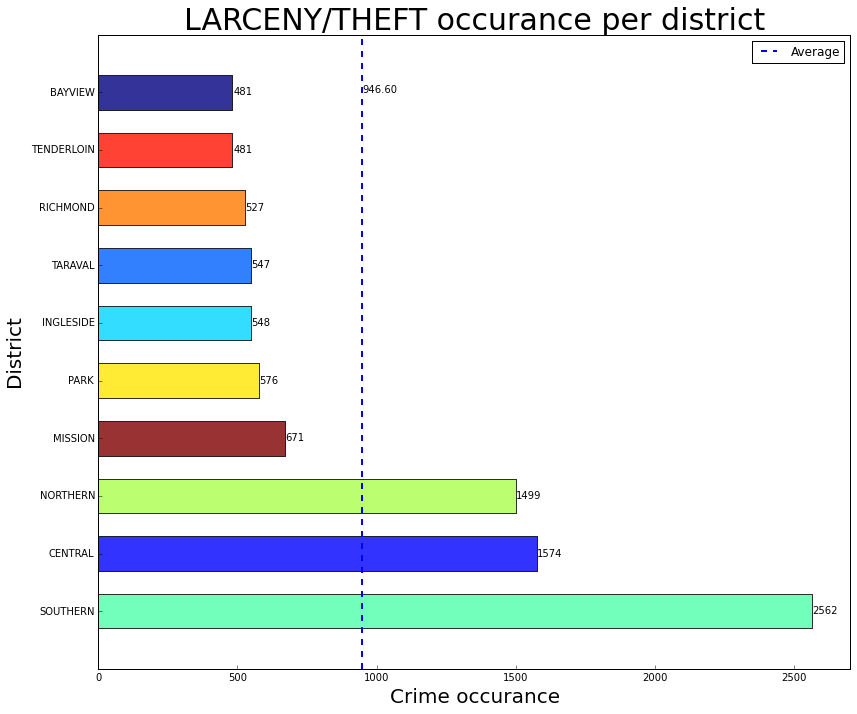

In [16]:
charttopcrime(reportlist_sanfrancisco)

The above chart, drills down on the location of the most common crime in San Francisco, i.e. larceny. In case of San Francisco the districts are not subdivide in zone, this make analysis granular to the district. The most incidents of larceny are reported in the southern district with an occurance two and half time above the city average. On the order hand, the bayview district registers the lowest incident in relation to larceny. Bayview is almost 50% below the city average.

##  Comparing Seattle and San Francisco

In this section, the data set of the two cities is analysed. In order to compare the data, some work must be performed to allign the naming conventions used.

In [17]:
OFFENSENAMING =  {"BIKE THEFT" : "BURGLARY",
                  "CAR PROWL"  : "BURGLARY",
                  "ESCAPE"     : "RUNAWAY",
                  "WARRANT ARREST" : "WARRANTS",
                  "VEHICLE THEFT" : "MAIL THEFT",
                  "WEAPON LAW" :  "WEAPON",
                  "DRUG/NARCOTIC" : "NARCOTICS",
                  "PORNOGRAPHY/OBSCENE MAT" : "PORNOGRAPHY",
                  "EMBEZZLEMENT" : "EMBEZZLE",
                  "WEAPON LAWS" : "WEAPON",
                  "LIQUOR VIOLATION" : "LIQUOR",
                  "LIQUOR LAWS" : "LIQUOR",
                  "FORGERY"   : "FORGERY/COUNTERFEIT",
                  "COUNTERFEIT" : "FORGERY/COUNTERFEIT",
                  "FORGERY/COUNTERFEITING" : "FORGERY/COUNTERFEIT",
                  "LOITERING" : "PROSTITUTION",
                  "PURSE SNATCH" : "ROBBERY",
                  "SHOPLIFTING" : "ROBBERY",
                  "PICKPOCKET" : "ROBBERY",
                  "DRIVING UNDER THE INFLUENCE" : "DUI",
                  "BURGLARY-SECURE PARKING-RES" : "BURGLARY",
                  "VIOLATION OF COURT ORDER" : "WARRANTS",
                  "RECKLESS BURNING" : "ARSON",
                  "THEFT OF SERVICES" : "ROBBERY",
                  "LARCENY/THEFT" : "BURGLARY",
                  "INJURY" : "DISORDERLY CONDUCT",
                  "DISTURBANCE" :  "DISORDERLY CONDUCT",
                  "ELUDING" : "DISORDERLY CONDUCT",
                  "OTHER PROPERTY": "BURGLARY",
                  "FAMILY OFFENSES" :  "DISORDERLY CONDUCT",
                  "FALSE REPORT"  :  "OTHER OFFENSES",
                  "OBSTRUCT"  :  "OTHER OFFENSES",
                  "TRAFFIC"  :  "OTHER OFFENSES",
                  "ANIMAL COMPLAINT" : "OTHER OFFENSES",
                  "LOST PROPERTY" : "NON-CRIMINAL",

}

def allignnaming(reportlist):
    for row in reportlist:
        if row.offense in OFFENSENAMING:
            row.offense = OFFENSENAMING[row.offense]


The two states use different categorisation labels. This above code alligns the naming conventions so as to allow comparision. Important to highlight and in some cases categories are merged as a state provides aggregated data whilst the other record crime with a more granular label.

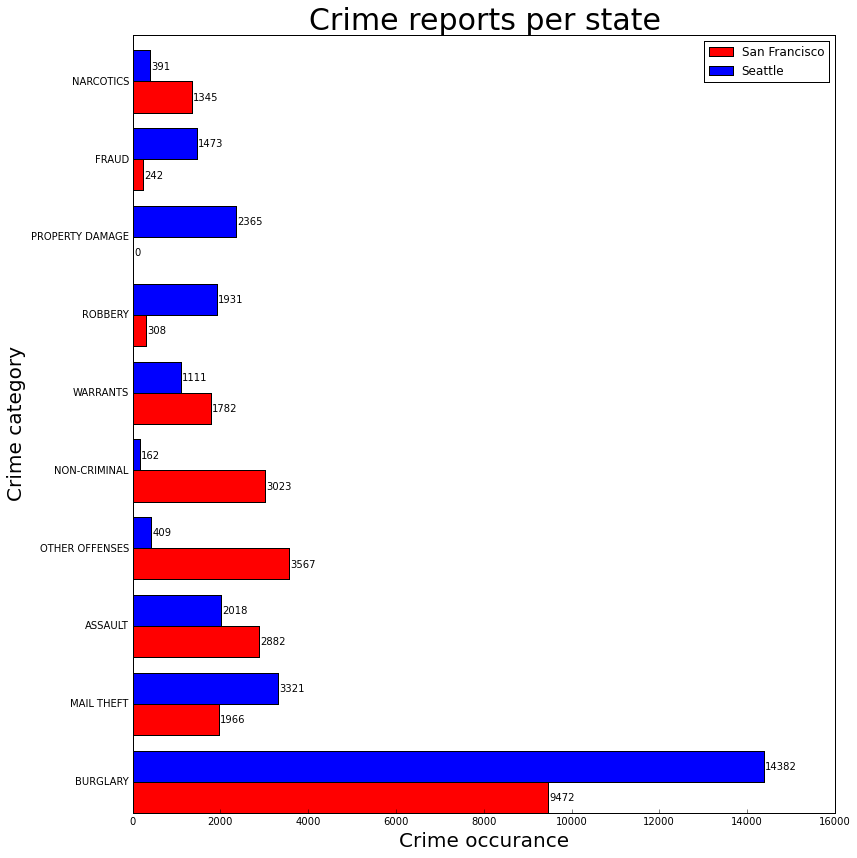

In [20]:
def prestatesdata(reportlist_seattle, reportlist_sanfrancisco):
    offenses = list(set([report.offense for report in reportlist_seattle] + [report.offense for report in reportlist_sanfrancisco]))

    off_sf, off_se, off_total = [], [], []
    for offense in offenses:
        tmp1 = (len(list([report.offense for report in reportlist_seattle if report.offense == offense])))

        off_se.append(tmp1)
        tmp2 = (len(list([report.offense for report in reportlist_sanfrancisco if report.offense == offense])))

        off_sf.append(tmp2)
        off_total.append(tmp1 + tmp2)

    # sort
    offenses,off_sf,off_se,off_total = (list(t) for t in zip(*sorted(zip(offenses,off_sf,off_se,off_total ),key=itemgetter(3))))
    
    while len(offenses) > 10: # keep 10 categories otherwise chart will be cluttered
        del offenses[0]
        del off_sf[0]
        del off_se[0]
        
#    indexes = list(range(len(offenses)))
#    shuffle(indexes)
#    offenses_s, off_sf_s, off_se_s = [], [], []
#    for i in indexes:
#        offenses_s.append(offenses[i])
#        off_sf_s.append(off_sf[i])
#        off_se_s.append(off_se[i])
    # sort
    offenses_s,off_sf_s,off_se_s,off_total = (list(t) for t in zip(*sorted(zip(offenses,off_sf,off_se,off_total ),key=itemgetter(3), reverse=True)))

    return offenses_s, off_sf_s, off_se_s

def chartstates(reportlist_seattle, reportlist_sanfrancisco):
    allignnaming(reportlist_sanfrancisco)
    allignnaming(reportlist_seattle)
    offenses, off_sf, off_se = prestatesdata(reportlist_seattle, reportlist_sanfrancisco)
    
    N = len(offenses)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.4       # the width of the bars: can also be len(x) sequence

    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)

    p1 = ax.barh(ind, off_sf, width, color='r')
    p2 = ax.barh(ind + width, off_se, width, color='b')

    ax.set_ylabel('Crime category', fontsize = 20 )
    ax.set_xlabel('Crime occurance', fontsize = 20 )
    ax.set_title('Crime reports per state', fontsize = 30 )
    ax.set_yticks(ind + (width ))
    ax.set_yticklabels(offenses)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.legend((p1[0], p2[0] ), ("San Francisco", "Seattle"))
    autolabelh(p1, ax)
    autolabelh(p2, ax)
    plt.tight_layout()

    
chartstates(reportlist_seattle, reportlist_sanfrancisco)



From the above chart, buglary/robbery/mail theft  is more common in Seattle than in San Francisco than in Seattle. Converseily assault and narcotics related crimes are more common in Seattle.

The likelihood of a burglary occuring  in Seattle is 35% higher than in San Francisco.

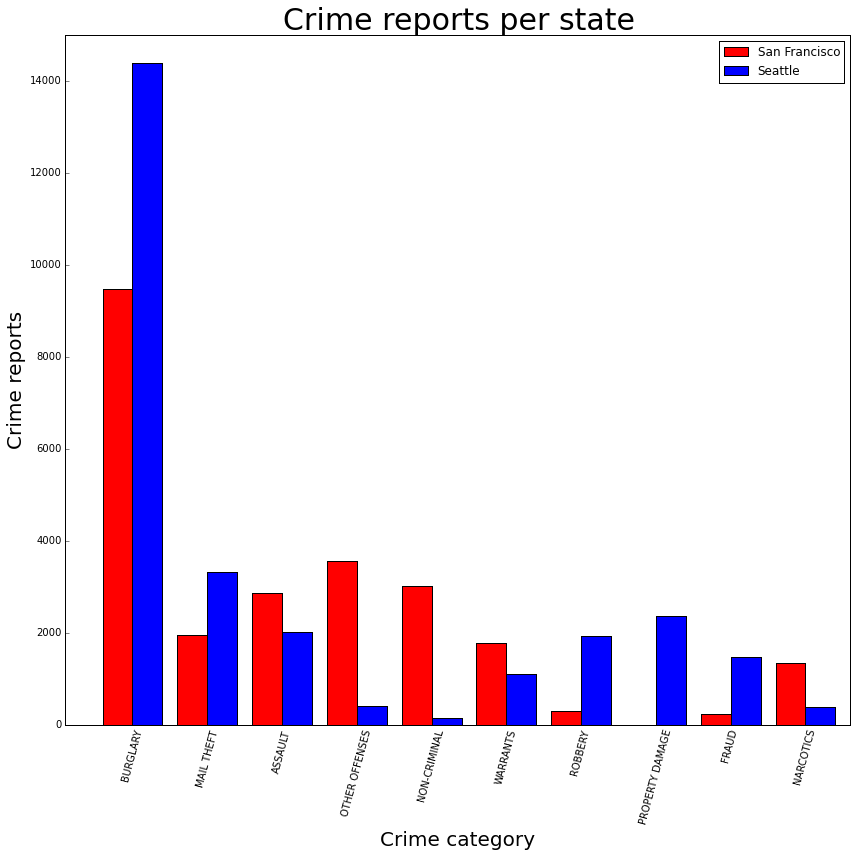

In [24]:
def chart4x(reportlist_seattle, reportlist_sanfrancisco):
    allignnaming(reportlist_sanfrancisco)
    allignnaming(reportlist_seattle)
    offenses, off_sf, off_se = precomparedata(reportlist_seattle, reportlist_sanfrancisco)
    
    N = len(offenses)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.4       # the width of the bars: can also be len(x) sequence

#    fig = plt.figure(figsize=(14,8))
    fig = plt.figure(figsize=(12,12))
    #    plt.axis([min(x_arr), max(x_arr), max(y_arr), 0])
    ax = fig.add_subplot(111)

    # fig, ax = plt.subplots()
#    p1 = ax.barh(ind, off_sf, width, color='r')
#    p2 = ax.barh(ind + width, off_se, width, color='b')
    p1 = ax.bar(ind, off_sf, width, color='r')
    p2 = ax.bar(ind + width, off_se, width, color='b')

    ax.set_ylabel('Crime reports', fontsize = 20 )
    ax.set_xlabel('Crime category', fontsize = 20 )
    ax.set_title('Crime reports per state', fontsize = 30 )
    ax.set_xticks(ind + (width ))
    ax.set_xticklabels(offenses, rotation=75)
 #   ax.set_xticks(ind + (width ))
#   ax.set_xticklabels(offenses)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.legend((p1[0], p2[0] ), ("San Francisco", "Seattle"))
#    autolabelh(p1, ax)
#    autolabelh(p2, ax)
#    autolabel(p1, ax)
#    autolabel(p2, ax)
#    plt.xticks(range(N), offenses, rotation=90)
#    plt.axis([min(x_arr), max(x_arr), max(y_arr), 0])
#    plt.axis([0,N , 0, 15000])
    # plt.axis([0,15200 , N, 0])
    #ax.grid(True)
    maxy_1 = max(off_se + off_sf)
    maxy = ceil((maxy_1/1000))*1000
    plt.axis([ -0.5, N ,0, maxy])
    plt.tight_layout()
    plt.show()

    
chart4x(reportlist_seattle, reportlist_sanfrancisco)

From the above chart, buglary/robbery/mail theft  is more common in Seattle than in San Francisco than in Seattle. Converseily assault and narcotics relatedcrimes are more common in Seattle.

In [65]:
def getCrimeTimeOccurance(alist, time):
    t = alist.get(time)
    return t if t is not None else 0

def filterDatasets(ds1, ds2):
    list_ds1 = [x for x in ds1 if x.offense == 'BURGLARY']
    list_ds1_time = offensetime(list_ds1, 'BURGLARY')
    
    list_ds2 = [x for x in ds2 if x.offense == 'BURGLARY']
    list_ds2_time = offensetime(list_ds2, 'BURGLARY')
    
    earlymorning, morning, afternoon, night = [], [], [],[]
    earlymorning.append(getCrimeTimeOccurance(list_ds1_time, EARLY_MORNING))
    earlymorning.append(getCrimeTimeOccurance(list_ds2_time, EARLY_MORNING))
    
    morning.append(getCrimeTimeOccurance(list_ds1_time, MORNING))
    morning.append(getCrimeTimeOccurance(list_ds2_time, MORNING))
    
    afternoon.append(getCrimeTimeOccurance(list_ds1_time, AFTERNOON))
    afternoon.append(getCrimeTimeOccurance(list_ds2_time, AFTERNOON))
    
    night= []
    night.append(getCrimeTimeOccurance(list_ds1_time, NIGHT))
    night.append(getCrimeTimeOccurance(list_ds2_time, NIGHT))
    
    return earlymorning, morning, afternoon, night




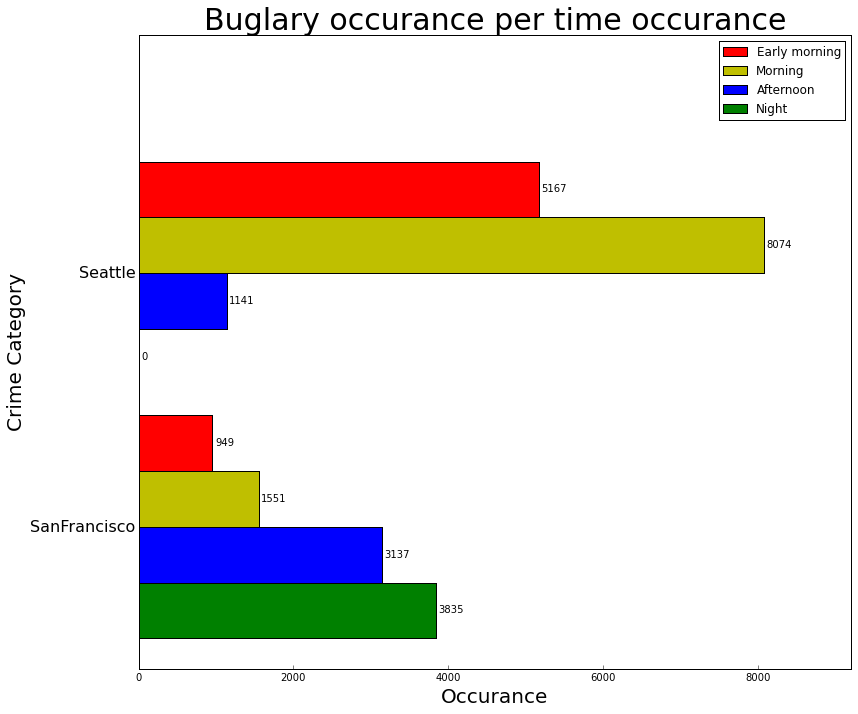

In [70]:
def plottopcrimecities(labels, earlymorning, morning, afternoon, night):
    N = len(labels)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.22     # the width of the bars: can also be len(x) sequence

    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    p1 = ax.barh(ind, earlymorning, width,   color='r')
    p2 = ax.barh(ind + width, morning, width, color='y')
    p3 = ax.barh(ind + (width * 2), afternoon, width,  color='b')
    p4 = ax.barh(ind + (width * 3), night, width, color='g')

    ax.set_title('Buglary occurance per time occurance' , fontsize = 30)
    plt.xlabel('Occurance', fontsize = 20 )
    plt.ylabel('Crime Category', fontsize = 20 )  
    ax.set_yticks(ind + (width * 2))
    ax.set_yticklabels(labels,  fontsize=16)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.legend((p1[0], p2[0], p3[0], p4[0]), (EARLY_MORNING, MORNING, AFTERNOON,NIGHT))
    autolabelh(p1, ax)
    autolabelh(p2, ax)
    autolabelh(p3, ax)
    autolabelh(p4, ax)
    maxx_1 = max(earlymorning + morning + afternoon + night)
    maxx = ceil((maxx_1/1150))*1150
    plt.axis([0, maxx, N   , -0.5])    
    plt.tight_layout()
    
earlymorning, morning, afternoon, night = filterDatasets(reportlist_seattle, reportlist_sanfrancisco)
plottopcrimecities(['Seattle','SanFrancisco'],earlymorning, morning, afternoon, night)


                    

The above chart plots the burglary category against the time band of the crime. Burglary is Seattle is most likely to happen between six and noon. Conversily in the afternoon/night the likelihood is very low thus its safer.


Using the census 2010 data, San Francisco (city) QuickFacts from the US Census Bureau. and Seattle (city) QuickFacts from the US Census Bureau. the population of San Francisco is 668,342 and that of Seattle is 852,469.

|State|Population|Reports|Incidents per capita|Burglary related reports|Incidents per capita|
|------|--------------|---------|------------------------|---------------------------|-------------------------|
|San Francisco|668,342|28993 |430 incidents per 10000 people|9462|14|
|Seattle|852,469|32779|384 incidents per 10000 people|14382|16|

From the table above, when using per capita metrics that take into consideration the size of the population, it transpires that the burglarly incidents per capita is slightly higher. Therefore the statement that people in Seattle are more prone to burglary is true but the chance is slightly more than San Francisco.

